In [4]:
import torch
import numpy as np
matplotlib inline
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn import svm

In [16]:
dtype = torch.FloatTensor
import scipy.io

images = np.load("./data/images.npy")
labels = np.load("./data/labels.npy")

images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))

images = images - images.mean()
images = images/images.std() 

train_seqs = images[0:40000]
val_seqs = images[40000:50000]

train_labels = labels[0:40000]
cv_labels = labels[40000:50000]



In [8]:
def accuracy(y, y_hat):
    count = 0
    for i in range(y.shape[0]):
        if y[i] == y_hat[i]:
            count += 1
    return count/y.shape[0]    
   


In [9]:
    import random
    import numpy as np
    clf = svm.SVC(decision_function_shape='ovo')
    train_accs, val_accs = [], [] 

    for j in range(100,6000,100):
        train_images = images[0:j]
        train_label = labels[0:j]
        clf.fit(train_images, train_label)
        
        i = np.random.choice(val_seqs.shape[0], size = 1000, replace=False)
        A = val_seqs[i].astype(np.float32)               
        B = cv_labels[i].astype(np.int)
        y_hat = clf.predict(A) 
        val_accs.append(accuracy(B,y_hat))
        
        ind = np.random.choice(train_seqs.shape[0], size = 1000, replace=False)
        x = train_seqs[ind].astype(np.float32)
        y = train_labels[ind].astype(np.int)
        y_hat = clf.predict(x)
        train_accs.append(accuracy(y,y_hat))
        print("%6d %5.2f %5.2f" % (j, train_accs[-1], val_accs[-1]))




   100  0.63  0.62
   200  0.68  0.68
   300  0.71  0.71
   400  0.71  0.71
   500  0.73  0.74
   600  0.75  0.77
   700  0.78  0.78
   800  0.77  0.78
   900  0.78  0.77
  1000  0.76  0.76
  1100  0.77  0.79
  1200  0.77  0.79
  1300  0.79  0.78
  1400  0.80  0.81
  1500  0.80  0.79
  1600  0.79  0.81
  1700  0.78  0.80
  1800  0.79  0.80
  1900  0.80  0.80
  2000  0.80  0.80
  2100  0.82  0.81
  2200  0.81  0.79
  2300  0.81  0.82
  2400  0.80  0.81
  2500  0.80  0.79
  2600  0.82  0.83
  2700  0.82  0.81
  2800  0.81  0.81
  2900  0.82  0.80
  3000  0.82  0.81
  3100  0.83  0.82
  3200  0.83  0.82
  3300  0.82  0.80
  3400  0.82  0.81
  3500  0.84  0.83
  3600  0.84  0.82
  3700  0.82  0.84
  3800  0.83  0.82
  3900  0.84  0.82
  4000  0.84  0.81
  4100  0.83  0.83
  4200  0.82  0.82
  4300  0.82  0.82
  4400  0.84  0.82
  4500  0.83  0.86
  4600  0.85  0.84
  4700  0.84  0.84
  4800  0.84  0.84
  4900  0.81  0.82
  5000  0.84  0.84
  5100  0.85  0.80
  5200  0.85  0.85
  5300  0.85

max_train accuracy:  0.86
max_val accuracy:  0.856


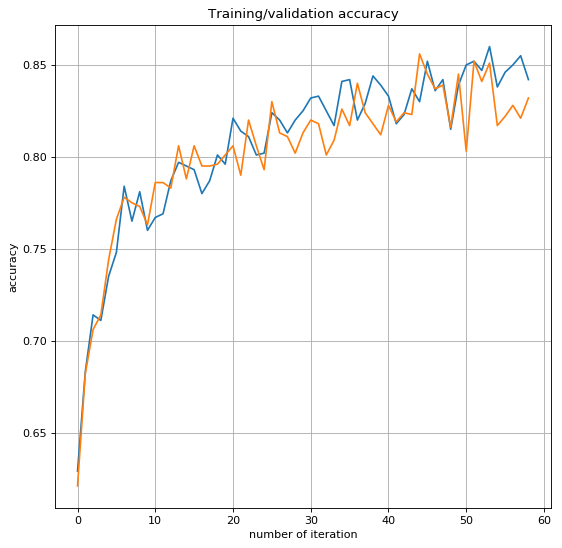

In [12]:
import matplotlib.pyplot as plt


t = np.arange(0,len(train_accs),1)

s = train_accs
k = val_accs
print("max_train accuracy: ", max(train_accs))
print("max_val accuracy: ", max(val_accs))
plt.figure(figsize=(8,8), dpi = 80)
plt.plot(t, s, t, k)

plt.xlabel('number of iteration')
plt.ylabel('accuracy')
plt.title('Training/validation accuracy')
plt.grid(True)
plt.show()